In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

In [15]:
!pip install yfinance
import yfinance as yf

# stock data of Bitcoin (BTC-USD))
data = yf.download('BTC-USD', start='2019-01-01', end='2024-12-31')
print(data.head())

/tmp/ipython-input-2163703121.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD', start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD     BTC-USD
Date                                                                      
2019-01-01  3843.520020  3850.913818  3707.231201  3746.713379  4324200990
2019-01-02  3943.409424  3947.981201  3817.409424  3849.216309  5244856836
2019-01-03  3836.741211  3935.685059  3826.222900  3931.048584  4530215219
2019-01-04  3857.717529  3865.934570  3783.853760  3832.040039  4847965467
2019-01-05  3845.194580  3904.903076  3836.900146  3851.973877  5137609824


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

sequence_length = 60   #past
future_days = 20  #predict

X, y = [], []
for i in range(sequence_length, len(scaled) - future_days):
    X.append(scaled[i-sequence_length:i, 0])
    y.append(scaled[i:i+future_days, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

print("Input shape:", X.shape, "Output shape:", y.shape)

Input shape: (2111, 60, 1) Output shape: (2111, 20)


In [17]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(future_days)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,270 (497.15 KB)

 Trainable params: 127,270 (497.15 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - loss: 0.0383 - val_loss: 0.0123
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0043 - val_loss: 0.0139
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0028 - val_loss: 0.0079
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0023 - val_loss: 0.0089
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0025 - val_loss: 0.0083
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0022 - val_loss: 0.0064
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0021 - val_loss: 0.0117
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0021 - val_loss: 0.0137
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 0.0020 - val_loss: 0.0104
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0020 - val_loss: 0.0107
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0021 - val_loss: 0.0049
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss:

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


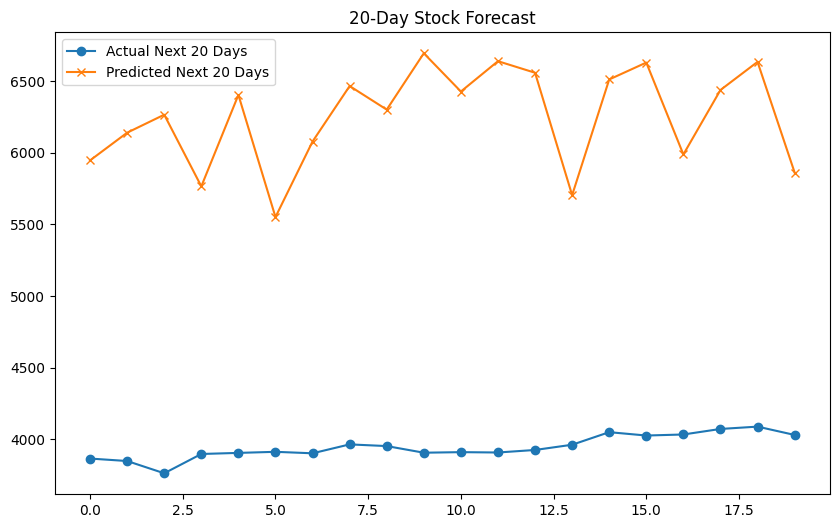

In [19]:
# Predict
predictions = model.predict(X)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y)

# Plot actual vs predicted for first sample
plt.figure(figsize=(10,6))
plt.plot(range(20), y_actual[0], marker='o', label="Actual Next 20 Days")
plt.plot(range(20), predictions[0], marker='x', label="Predicted Next 20 Days")
plt.legend()
plt.title("20-Day Stock Forecast")
plt.show()

In [21]:
last_sequence = scaled[-sequence_length:]
last_sequence = last_sequence.reshape((1, sequence_length, 1))

future_prediction = model.predict(last_sequence)
future_prediction = scaler.inverse_transform(future_prediction)

print("Next 20 days prediction:\n", future_prediction.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Next 20 days prediction:
 [91751.414 91200.16  91079.17  92088.06  90741.56  89926.22  91746.67
 91105.94  89177.164 90410.5   90610.22  90782.516 90552.14  89062.875
 89906.664 88447.375 89011.47  87899.82  87395.45  87719.305]
